In [1]:
## Select desired libraries
import tensorflow as tf
from sklearn.model_selection import RepeatedKFold
import earthdata as ed
import numpy as np
import areaplot as ap

In [2]:
# Define model
def get_model(n_inputs, n_outputs):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(20, input_dim=n_inputs, activation='relu'))
    model.add(tf.keras.layers.Dense(50, kernel_initializer='he_uniform', activation='exponential'))
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.Dense(50, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(n_outputs))
    model.compile(loss = 'mae' , optimizer='adam')
    #print(model.summary())
    return model

In [3]:
# Constant definitions
DATASET_NAME = 'MODIS/006/MOD44W'  # Name of dataset to extract water bodies information
STARTING_DATE = '2000-01-01'  # First element of the dataset
ENDING_DATE = '2015-05-01'  # Last element of the dataset
BAND = 'water_mask'  # Dataset band we are interested in

# User parameters
lat, lon = 20.24, -103.06  # Center coordinates
dx = 0.8  # Rectangle length
dy = 0.3  # Rectangle width

data_proxy = ed.EarthData()
data_proxy.select_dataset(DATASET_NAME, STARTING_DATE, ENDING_DATE, BAND)
X, y, rows, columns = data_proxy.get_dataset(lat, lon, dx, dy)
X_t = tf.constant(X)
X_t = X_t-2000
y_t = tf.constant(y)

Metal device set to: Apple M1


2022-06-25 11:55:18.717943: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-25 11:55:18.718043: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2022-06-25 11:55:19.007349: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-25 11:55:19.189463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1.0188183
-0.019580739


2022-06-25 11:55:23.695214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


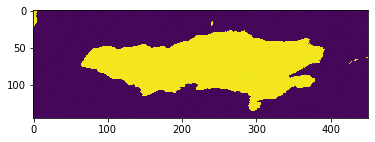

In [4]:
n_inputs, n_outputs = X_t.shape[1], y_t.shape[1]
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
model.fit(X_t, y_t, verbose=0, epochs=200)
newX = tf.constant([2005-2000])
y_predicted = model.predict(newX)

ed.plot_map(y_predicted.flatten(), rows, columns)
print(y_predicted.max())
print(y_predicted.min())

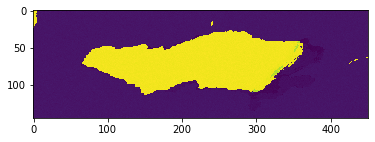

In [7]:
newX = tf.constant([2000-2000])
y_predicted = model.predict(newX)
ed.plot_map(y_predicted.flatten(), rows, columns)

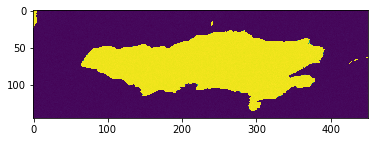

In [8]:
# plot predicted map
newX = tf.constant([2015-2000])
y_predicted = model.predict(newX)
ed.plot_map(y_predicted.flatten(), rows, columns)

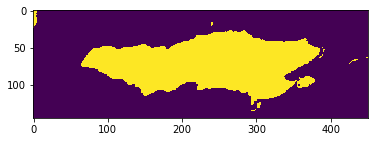

In [9]:
# plot original map
ed.plot_map(y[2015-2000].flatten(), rows, columns)

In [9]:
rect_1 = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
                  )

In [10]:
rect_2 = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0],
                   [0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0],
                   [0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0],
                   [0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
                  )

In [11]:
rect_3 = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0],
                   [0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0],
                   [0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0],
                   [0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0],
                   [0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0],
                   [0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
                  )

In [12]:
rect_4 = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0],
                   [0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0],
                   [0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0],
                   [0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0],
                   [0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0],
                   [0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0],
                   [0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0],
                   [0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
                  )

In [10]:
y_rect = tf.constant([rect_1.flatten(), rect_2.flatten(), rect_3.flatten(), rect_4.flatten()])
X_rect = [[1],[2],[3],[4]]
y = tf.constant(y_rect)
X = tf.constant(X_rect)

NameError: name 'rect_1' is not defined

2022-06-25 10:10:15.016282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-25 10:10:26.520851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


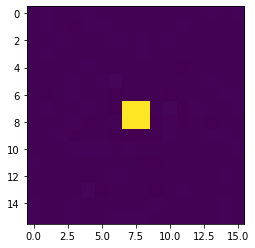

In [14]:
n_inputs, n_outputs = X.shape[1], y.shape[1]
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
model.fit(X, y, verbose=0, epochs=2000)
newX = tf.constant([1])
y_predicted = model.predict(newX)
ed.plot_map(y_predicted.flatten(), 16, 16)

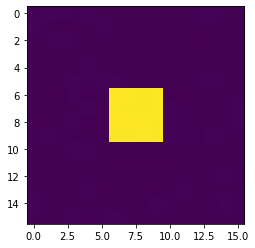

In [15]:
newX = tf.constant([2])
y_predicted = model.predict(newX)
ed.plot_map(y_predicted.flatten(), 16, 16)

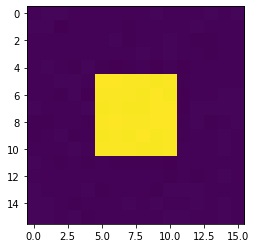

In [16]:
newX = tf.constant([3])
y_predicted = model.predict(newX)
ed.plot_map(y_predicted.flatten(), 16, 16)

In [21]:
area1 = np.count_nonzero(rect_1)
area2 = np.count_nonzero(rect_2)
area3 = np.count_nonzero(rect_3)
area4 = np.count_nonzero(rect_4)

In [37]:
delta_area2 = (area2-area1)/area1*100
delta_area2

300.0

In [38]:
delta_area3 = (area3-area2)/area2*100
delta_area3

125.0

In [39]:
delta_area4 = (area4-area3)/area3*100
delta_area4

77.77777777777779

In [40]:
area2*(1+delta_area3/100) == area3

True

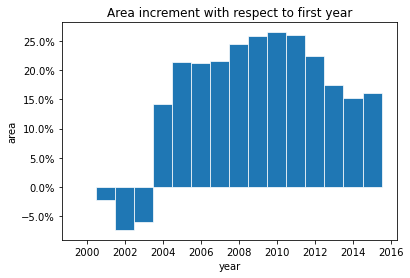

In [5]:
dates, areas = ap.get_delta_area_list(X, y)
ap.plot_dareas(dates, areas)